# **Graphs and Linear Algebra**

\\
##**Project Overview:**

For this project, we combine graph theory and linear algebra to prove several concepts relating to $k$-regular graphs. We start with a graph of nodes and edges that can be represented as a matrix, where each node is numbered and represents its number on the row and column of the matrix. Whatever other nodes it is connected to, or has an adjacency with, it will be represented with a $1$ as there is one connection between the nodes. Every edge will be an undirected edge for this project. These connections will help to create what we call an adjacency matrix, the matrix representation of a $k$-regular graph.

Our graph being $k$-regular simply means each node will have exactly $k$ edges, however, as we proceed through this project, we will show that not every graph can be $k$-regular for any value of $k$. We will also demonstrate that if a graph is $k$-regular, it will possess certain properties that hold true for all $k$-regular graphs, and can be proven using linear algebra.

We will now go step by step through each problem, providing descriptions of what needs to be accomplished and what approach I will use in order to solve the problem. We begin by importing all the necessary libraries needed to complete this project, including `networkx`, which is vital for visualizing the graphs of this project.

In [ ]:
import networkx as nx
import math
import numpy as np
import sympy as sm
sm.init_printing(use_latex='mathjax')
import matplotlib.pyplot as plt
import itertools

## **Problem A**

**Problem:** Find three graphs with more than five nodes that are 2-regular, 3-regular, and 4-regular. Represent these in `networkx`, draw them, and find their adjacency matrices. These will be running examples for this problem.

**Approach:** The approach to this problem is relatively straightforward. We already have an idea of what the components of a graph are and what the definition of a $k$-regular graph is. Using the `networkx` library, we will create the graph by calling the `Graph()` class, which is the base class for undirected graphs. Then, we will use `add_nodes_from()` to add the respective nodes and `add_edges_from()` to establish the edge connections of the respective graphs.

We also need to turn these graphs into adjacent matrices. Per theory, an adjacency matrix of an undirected graph has $A_{i,j} = 1$ if and only if nodes $i$ and $j$ are adjacent, where $i$ represents the row and $j$ the column. Since these will be $k$-regular graphs, each row and column will have $k$ amount of $1$s. The code below will plot the graphs and display the matrices, which will then be used for the rest of the project.

The graphs will all be in the shape of hexagons with $6$ nodes. The $2$-regular graph will be designated as $G2$ and every numbered node will connect to its number neighbor. It will have designated adjacency matrix of $A2$.

The $3$-regular graph, $G3$, will have the same feature as $G2$ for the first $2$ connections for each node, but the third connection will be to the node opposite of its position. It will have designated adjacency matrix of $A3$.

The $4$-regular graph, $G4$, will have the same feature as $G2$ for the first $2$ connections for each node,but for the final $2$ connections it will connect to its number neighbor's others neighbor. This will create a $6$ sided star inside the hexagon. It will have designated adjacency matrix of $A4$.


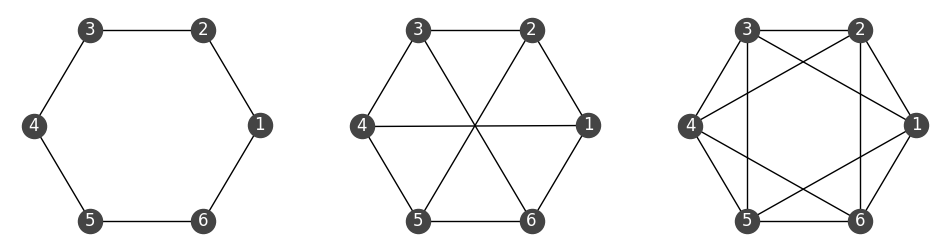

In [ ]:
# Code for problem A
G2 = nx.Graph() # Create graph
G2.add_nodes_from([1,2,3,4,5,6]) # Create nodes
G2.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1)]) # Create edges

G3 = nx.Graph() # Create graph
G3.add_nodes_from([1,2,3,4,5,6]) # Create nodes
G3.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,4),(2,5),(3,6)]) # Create edges

G4 = nx.Graph() # Create graph
G4.add_nodes_from([1,2,3,4,5,6]) # Create nodes
G4.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,1),(1,3),(1,5),(2,6),(2,4),(3,5),(4,6)]) # Create edges

# Adjacent Matrices for Problem A
A2 = sm.Matrix([
    [0,1,0,0,0,1],[1,0,1,0,0,0],[0,1,0,1,0,0],[0,0,1,0,1,0],[0,0,0,1,0,1],[1,0,0,0,1,0]
])
A3 = sm.Matrix([
    [0,1,0,1,0,1],[1,0,1,0,1,0],[0,1,0,1,0,1],[1,0,1,0,1,0],[0,1,0,1,0,1],[1,0,1,0,1,0]
])
A4 = sm.Matrix([
    [0,1,1,0,1,1],[1,0,1,1,0,1],[1,1,0,1,1,0],[0,1,1,0,1,1],[1,0,1,1,0,1],[1,1,0,1,1,0]
])

#Plot
graph,ax = plt.subplots(1,3,figsize=(12,3))
nx.draw(G2, ax=ax[0], pos=nx.kamada_kawai_layout(G2),with_labels=True, node_color='#444444',font_color="white")
nx.draw(G3, ax=ax[1], pos=nx.kamada_kawai_layout(G3),with_labels=True, node_color='#444444',font_color="white")
nx.draw(G4, ax=ax[2], pos=nx.kamada_kawai_layout(G4),with_labels=True, node_color='#444444',font_color="white")

In [ ]:
# Adjacent Matrices for Problem A

A2,A3,A4

⎛⎡0  1  0  0  0  1⎤  ⎡0  1  0  1  0  1⎤  ⎡0  1  1  0  1  1⎤⎞
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎜⎢1  0  1  0  0  0⎥  ⎢1  0  1  0  1  0⎥  ⎢1  0  1  1  0  1⎥⎟
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎜⎢0  1  0  1  0  0⎥  ⎢0  1  0  1  0  1⎥  ⎢1  1  0  1  1  0⎥⎟
⎜⎢                ⎥, ⎢                ⎥, ⎢                ⎥⎟
⎜⎢0  0  1  0  1  0⎥  ⎢1  0  1  0  1  0⎥  ⎢0  1  1  0  1  1⎥⎟
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎜⎢0  0  0  1  0  1⎥  ⎢0  1  0  1  0  1⎥  ⎢1  0  1  1  0  1⎥⎟
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎝⎣1  0  0  0  1  0⎦  ⎣1  0  1  0  1  0⎦  ⎣1  1  0  1  1  0⎦⎠

#**Problem B**

**Problem:** Find the eigenvalues of the three examples, along with the multiplicities of the eigenvalues.

**Approach:** From problem $A$, we defined the adjacency matrices for the three graphs. Now we need to find the eigenvalues of each matrix along with their multiplicity. The eigenvalues can be computed by taking the determinant of the following equation:
$$det(A-\lambda I)=0$$

where $A$ is the adjacency matrix, $\lambda$ represents the eigenvalue which is what we solve for, and $I$ is the identity matrix.

We also need to take the multiplicity of each eigenvalue. For this problem, we define the multiplicity as the number of independent eigenvectors associated with an eigenvalue. For both tasks, we will use the `eigenvals()` method from `Sympy`. What this method returns is a dictionary with the eigenvalues as the key and the algebraic multiplicity as the value. The code below will display the eigenvalues and their multiplicity, which will be relevant for the next several problems.

In [ ]:
# Code for Problem B

print("For 2-Regular Graph:")
a2=A2.eigenvals() # Store dictionary values in variable a2
for i in a2:
  # Simple method to print the key and value of a dictionary item, iterate for all items in dictionary
  print("Eigenvalue",i,"has multiplicity", a2[i])

print("\nFor 3-Regular Graph:")
a3=A3.eigenvals() # Store dictionary values in variable a3
for i in a3:
  print("Eigenvalue",i,"has multiplicity", a3[i])

print("\nFor 4-Regular Graph:")
a4=A4.eigenvals() # Store dictionary values in variable a4
for i in a4:
  print("Eigenvalue",i,"has multiplicity", a4[i])

For 2-Regular Graph:
Eigenvalue 2 has multiplicity 1
Eigenvalue -2 has multiplicity 1
Eigenvalue 1 has multiplicity 2
Eigenvalue -1 has multiplicity 2

For 3-Regular Graph:
Eigenvalue -3 has multiplicity 1
Eigenvalue 3 has multiplicity 1
Eigenvalue 0 has multiplicity 4

For 4-Regular Graph:
Eigenvalue 4 has multiplicity 1
Eigenvalue -2 has multiplicity 2
Eigenvalue 0 has multiplicity 3


#**Problem C**

**Problem:** Show that if $G$ is $k$-regular, then $k$ is an eigenvalue of $G$.

**Approach:** To prove $k$ is an eigenvalue of a $k$-regular graph $G$, we need to consider the adjacency matrix $A_{ij}$ as defined previously in Problem $A$. Per theory, we know $Av= \lambda v$ where $v$ is the eigenvector.

Let $v=(x_1,x_2,...x_n)^t$ where all entries up to $x_n$ are equal to $1$. Considering the product of $Av$ is given by the first equation below, the sum is reduced a $k$ amount of entries of $1$, thus proving that a $k$-regular graph has an eigenvalue of $k$.

$$
(Av)_i=\sum_{j=1}^n A_{ij} v_j \\
(Av)_i=\sum_{k=1}^n 1=k \\
Av=kv
$$

For every $A_{ij} \neq 0$, we will have $1$ where the eigenvector will equal $(1,1,...,1)^t$, thus $\lambda=k$.

In the code below, we will find the eigenvector for every eigenvalue $k$ to ensure $v=(1,1,...,1)$. The function `eigenvects` returns a tuple which includes the eigenvalue, miltiplicity, and eigenvector. The code will need to access each element specifically for each eigenvalue in order to print the demonstration.

In [ ]:
# Code for Problem C

# Find eigenvectors for all adjacency matrices
v2=A2.eigenvects()
v3=A3.eigenvects()
v4=A4.eigenvects()

# Print eigenvector for each k eigenvalue
print("For matrix A2, the eigenvector of",v2[3][0] ,"is:" ,v2[3][2])
print("For matrix A3, the eigenvector of",v3[2][0] ,"is:" ,v3[2][2])
print("For matrix A4, the eigenvector of",v4[2][0] ,"is:" ,v4[2][2])

For matrix A2, the eigenvector of 2 is: [Matrix([
[1],
[1],
[1],
[1],
[1],
[1]])]
For matrix A3, the eigenvector of 3 is: [Matrix([
[1],
[1],
[1],
[1],
[1],
[1]])]
For matrix A4, the eigenvector of 4 is: [Matrix([
[1],
[1],
[1],
[1],
[1],
[1]])]


#**Problem D**

**Problem:** Show that if $G$ is $k$-regular and connected, then the eigenvalue $k$ of $G$ has multiplicity one.

**Approach:** To prove the statement above, we will use the help of the Perron-Frobenius theorem for regular matrices. The theorem states that if matrix $A$ is an irreducible nonnegative square matrix, it will have an algebraic and geometric multiplicity of one.

Because our graph $G$ is connected and $k$-regular, it is nonnegative. As we have shown in Problem $B$ this will produce real and positive maximum eigenvalues as well a nonnegative eigenvector for $v$ such that $Av=kv$. Additionally, the Jordan block $J$ of a matrix will show each eigenvalue of $A$ on the diagonal.

Using the Jordan form $J$, the adjacency matrix $A$ is irreducible if there exists a permutation matrix $P$ where $A=PJP^{-1}$.

In the code below, we find the Jordan form for each of our matrices. If the theorem is correct, the $k$ eigenvalue for each matrix should only appear once in the diagonal.

In [ ]:
# Code for Problem D

# Compute Jordan form for each adjacency matrix, P is the permutation matrix
P2,J2 = A2.jordan_form()
P3,J3 = A3.jordan_form()
P4,J4 = A4.jordan_form()

print("Jordan form for adjacency matrices A2, A3, and A4 respectively, each with their k eigenvalues appearing once in the diagonal:")
J2,J3,J4

Jordan form for adjacency matrices A2, A3, and A4 respectively, each with their k eigenvalues appearing once in the diagonal:


⎛⎡-2  0   0   0  0  0⎤  ⎡-3  0  0  0  0  0⎤  ⎡-2  0   0  0  0  0⎤⎞
⎜⎢                   ⎥  ⎢                 ⎥  ⎢                  ⎥⎟
⎜⎢0   -1  0   0  0  0⎥  ⎢0   0  0  0  0  0⎥  ⎢0   -2  0  0  0  0⎥⎟
⎜⎢                   ⎥  ⎢                 ⎥  ⎢                  ⎥⎟
⎜⎢0   0   -1  0  0  0⎥  ⎢0   0  0  0  0  0⎥  ⎢0   0   0  0  0  0⎥⎟
⎜⎢                   ⎥, ⎢                 ⎥, ⎢                  ⎥⎟
⎜⎢0   0   0   1  0  0⎥  ⎢0   0  0  0  0  0⎥  ⎢0   0   0  0  0  0⎥⎟
⎜⎢                   ⎥  ⎢                 ⎥  ⎢                  ⎥⎟
⎜⎢0   0   0   0  1  0⎥  ⎢0   0  0  0  0  0⎥  ⎢0   0   0  0  0  0⎥⎟
⎜⎢                   ⎥  ⎢                 ⎥  ⎢                  ⎥⎟
⎝⎣0   0   0   0  0  2⎦  ⎣0   0  0  0  0  3⎦  ⎣0   0   0  0  0  4⎦⎠

#**Problem E**

**Problem:** Show that if $G$ is $k$-regular then $|\lambda|\leq k$ for any eigenvalue $\lambda$ of $G$.

**Approach:** Once again, we will rely on the Perron-Frobenius theorem for a proof. The theorem states that for a matrix $A$, which is nonnegative, there exists a number $r$ which is the maximum eigenvalue of $A$ and all other eigenvalues $\lambda$ are strictly smaller than $r$ so that $|\lambda | \le r$. Since $A$ is also irreducible, the theorem ensures the existence of a positive eigenvalue.

Let $A$ be the adjacency matrix of $k$-regular graph $G$. Let $v$ be an eigenvector of eigenvalue $\lambda$. Per theory, we know $Av= \lambda v$. Let $v=(x_1,x_2,...x_n)^t$ where we assume $x_1$ is the maximum value. From all this, we have:

$$
| \lambda ||x_1|=|\sum_{j=1}^n A_{1j}x_j| \le \sum_{j=1}^n A_{1j} \\
| \lambda ||x_1|=|x_1|deg(v_1) \le |x_1|k \\
\rightarrow | \lambda| \le k.
$$

The code from Problem $B$ is a demonstration of the proof for each adjacency matrix since it shows that all eigenvalues of $A$ are smaller than or equal to $k$.

#**Problem F**

**Problem:** Let $J$ be the matrix of all ones and $A$ be the adjacency matrix of a $k$-regular graph. Show that $AJ = JA=kJ$.

**Approach:**

This problem asks us to prove the commutative property of $AJ, JA$, and $kJ$. Before we prove anything, let's define matrix multiplication for this problem. We define matrices $A$ and $B$ and their respective elements as below. We distinguish rows as $i$ and columns as $j$, and because we're dealing with adjacent matrices, they will be square matrices with an equal number of rows and columns. The multiplication output of $AB$ will equal $C$ where every element is defined as the summation $c_{ij}$, which is a dot product for a row of $A$ and column of $B$.

Now that we have the basic theory in place, let's explain why $AJ=JA$. $A$ and $J$ are equal in size. $A$ has elements of $0$s and $1$s with a $k$ amount of $1$s in each row and column, while $J$ is all $1$s. For $AJ$, if we pick any row of $A$ and any column of $J$, we will have only two possible products, $0 \times 1$ and $1 \times 1$. Hence, if every row of $A$ only has $k$ $1$s, that will be the value of the dot product for the element in Matrix $C$. The same logic applies for $JA$, only backwards, a row of all $1$s and a column of $k$ $1$s will make a dot product equal to $k$. The end result in both matrices is a matrix where every element is $k$.

$kJ$ is a scalar product where every element in $J$ is multiplied by $k$. If every element of $J$ equals $1$, then every element of $kJ$ will equal $k$. Thus, $AJ=JA=kJ$.

The code below uses matrix $A4$ from previous examples to demonstrate this proof.

$$
A = \begin{pmatrix}
a_{11} & a_{12} & ... &a_{1j} \\
a_{21} & a_{22} & ... &a_{2j} \\
... & ... & ... & ... \\
a_{i1} & a_{i2} & ... &a_{ij} \\
\end{pmatrix}
$$

$$
B = \begin{pmatrix}
b_{11} & b_{12} & ... &b_{1j} \\
b_{21} & b_{22} & ... &b_{2j} \\
... & ... & ... & ... \\
b_{i1} & b_{i2} & ... &b_{ij} \\
\end{pmatrix}
$$

$$
c_{ij}=a_{i1}b_{1j}+a_{i2}b_{2j}+...+a_{im}b_{mj}=\sum_{k=1}^m a_{ik} b_{kj}
$$

$$
C = \begin{pmatrix}
a_{11}b_{11}+...+ a_{1j}b_{i1} & a_{11}b_{12}+...+ a_{1j}b_{i2} & ... &a_{11}b_{1j}+...+ a_{1j}b_{ij} \\
a_{21}b_{11}+...+ a_{2j}b_{i1} & a_{21}b_{12}+...+ a_{2j}b_{i2} & &a_{21}b_{1j}+...+ a_{2j}b_{ij} \\
... & ... & ... & ... \\
a_{i1}b_{11}+...+ a_{ij}b_{i1} & a_{i1}b_{12}+...+ a_{ij}b_{i2} & ... &a_{i1}b_{1j}+...+ a_{ij}b_{ij} \\
\end{pmatrix}
$$

In [ ]:
# Code for Problem F
J = sm.Matrix([
    [1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1],[1,1,1,1,1,1]
])


# Prove the commutative property AJ=JA=kJ
A4@J,J@A4,4*J

⎛⎡4  4  4  4  4  4⎤  ⎡4  4  4  4  4  4⎤  ⎡4  4  4  4  4  4⎤⎞
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎜⎢4  4  4  4  4  4⎥  ⎢4  4  4  4  4  4⎥  ⎢4  4  4  4  4  4⎥⎟
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎜⎢4  4  4  4  4  4⎥  ⎢4  4  4  4  4  4⎥  ⎢4  4  4  4  4  4⎥⎟
⎜⎢                ⎥, ⎢                ⎥, ⎢                ⎥⎟
⎜⎢4  4  4  4  4  4⎥  ⎢4  4  4  4  4  4⎥  ⎢4  4  4  4  4  4⎥⎟
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎜⎢4  4  4  4  4  4⎥  ⎢4  4  4  4  4  4⎥  ⎢4  4  4  4  4  4⎥⎟
⎜⎢                ⎥  ⎢                ⎥  ⎢                ⎥⎟
⎝⎣4  4  4  4  4  4⎦  ⎣4  4  4  4  4  4⎦  ⎣4  4  4  4  4  4⎦⎠

#**Problem G**

**Problem:** Show by construction that there exists regular graph with least eigenvalue equal to $-2$.

**Approach:** Unlike the previous problems, here we are being asked to make a proof by construction. Technically, we made this proof already in Problems $A$ and $B$ with graphs $G2$ and $G4$. In the spirit of the problem, we will create another $k$-regular graph, this time with $8$ nodes, that will still have an eigenvalue of $-2$. It will be similar to the $G2$ graph as every node connects to its number neighbor.

We will use code similar to what was seen in Problems $A$ and $B$ to print the graph and show the adjacency matrix eigenvalues and their multiplicities

⎡0  1  0  0  0  0  0  1⎤
⎢                      ⎥
⎢1  0  1  0  0  0  0  0⎥
⎢                      ⎥
⎢0  1  0  1  0  0  0  0⎥
⎢                      ⎥
⎢0  0  1  0  1  0  0  0⎥
⎢                      ⎥
⎢0  0  0  1  0  1  0  0⎥
⎢                      ⎥
⎢0  0  0  0  1  0  1  0⎥
⎢                      ⎥
⎢0  0  0  0  0  1  0  1⎥
⎢                      ⎥
⎣1  0  0  0  0  0  1  0⎦

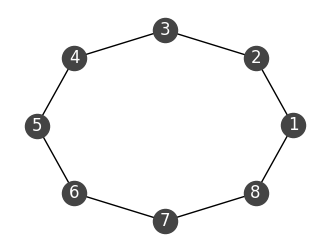

In [ ]:
# Code for problem G
G = nx.Graph() # Create graph
G.add_nodes_from([1,2,3,4,5,6,7,8]) # Create nodes
G.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,1)]) # Create edges
A = sm.Matrix([
    [0,1,0,0,0,0,0,1],[1,0,1,0,0,0,0,0],[0,1,0,1,0,0,0,0],[0,0,1,0,1,0,0,0],[0,0,0,1,0,1,0,0],[0,0,0,0,1,0,1,0],[0,0,0,0,0,1,0,1],[1,0,0,0,0,0,1,0]
])

#Plot
graph,ax = plt.subplots(1,1,figsize=(4,3))
nx.draw(G, ax=ax, pos=nx.kamada_kawai_layout(G),with_labels=True, node_color='#444444',font_color="white")
A # Adjacency Matrix

In [ ]:
# Print Eigenvalues for Problem G

print("For 2-Regular Graph:")
a=A.eigenvals()
for i in a:
  print("Eigenvalue",i,"has multiplicity", a[i])

For 2-Regular Graph:
Eigenvalue 2 has multiplicity 1
Eigenvalue -2 has multiplicity 1
Eigenvalue -sqrt(2) has multiplicity 2
Eigenvalue sqrt(2) has multiplicity 2
Eigenvalue 0 has multiplicity 2


#**Problem H**

**Problem:** Show that the following graph, called the Petersen Graph, is $3$-regular by finding its eigenvalues.

<img src="https://www.researchgate.net/profile/Paul_Wenger/publication/45714891/figure/fig1/AS:669480808091681@1536628071715/The-Petersen-graph.png" width=20%>

**Approach:** This problem is a culmination of the work that we have done so far for this project. We know how to create an adjacency matrix of a graph and how to find its eigenvalues, and how to solve these problems using Python. The solution for this will be very straightforward.

For this graph, the right most node of the inner star will be node $1$ and the subsequent nodes will be iterated by $1$ in the counterclockwise direction. Then, the right most node of the outer pentagon will be node $6$, and again we iterate counterclockwise to node $10$.

In the code, we simply create the adjacency matrix then find its eigenvalues along with their multiplicity to ensure that the graph is actually $3$-regular by having an eigenvalue of $3$ with multiplicity $1$.

In [ ]:
# Code for Problem H

# Create adjacency matrix
H = sm.Matrix([
    [0,1,0,0,1,1,0,0,0,0],
    [1,0,1,0,0,0,1,0,0,0],
    [0,1,0,1,0,0,0,1,0,0],
    [0,0,1,0,1,0,0,0,1,0],
    [1,0,0,1,0,0,0,0,0,1],
    [1,0,0,0,0,0,0,1,1,0],
    [0,1,0,0,0,0,0,0,1,1],
    [0,0,1,0,0,1,0,0,0,1],
    [0,0,0,1,0,1,1,0,0,0],
    [0,0,0,0,1,0,1,1,0,0]
])

# Print eigenvalues
print("A 3-Regular Petersen Graph Has:")
h=H.eigenvals()
for i in h:
  print("Eigenvalue",i,"with multiplicity", h[i])

A 3-Regular Petersen Graph Has:
Eigenvalue 3 with multiplicity 1
Eigenvalue -2 with multiplicity 4
Eigenvalue 1 with multiplicity 5


#**Problem I**

**Problem:** Show that if both $n \geq k+1$ and $nk$ is even, then there exists a $k$-regular graph of size $n$.

**Approach:** For this proof, we will use the process of induction on $k$ and $n$. We will start at $k=1$ since a $0$ value would not satisfy $nk=even$.

**If $k=1$**, the minimum value of $n$ is $2$. The multiple of $nk$ is even and creates a $1$-regular graph. However, if $n=3$, there will be an additional node that is not connected, thus breaking the $k$-regular graph. However, it would work for $n=4$. Thus, as long as $n$ is even, it will satisfy both conditions above and a $k$-regular graph of size $n$ will exist.

**If $k=2$**, the minimum value of $n$ is $3$. The multiple of $nk$ is even and creates a $2$-regular graph. In fact, a $2$-regular graph will work with any number $n$ because all you need is every node connecting with its number neighbor(including the last node connecting with the first). An example of this is from problem $A$ with the $6$ node $2$-regular graph.

**If $k=3$**, an interesting situation develops. When $n$ is even, you assume the first $2$ node connections for any node can be to their number neighbors, as described when $k=2$. That means the third node connection has to happen with any other number left in the set $A$. So long as there is an even number of nodes, all you have to make is one edge connections between the remaining $n$ nodes, similar to the $k=1$ situation. What we did here essentially was we broke down the problem to connect the nodes per $k=2$ first, then the remaining unconnected nodes per $k=1$, all within the same graph.

**If $k>3$**, we have two scenarios, $n=k+1$, and $n> k+1$

**For $n=k+1$**, one variable is odd, the other even, thus $nk=even$. A $k$-regular graph will exist because it implies every node $n$ is connected to every other node $n$.

**For $n>k+1$**, we have two situations where both $n$ and $k$ are even and both have opposing parity.

*   **$n$ and $k$ are even:** A $k$-regular graph will exist because both numbers will have a common denominator of at least $2$. Thus, every node will connect to all but $n-k$ nodes, equally distributed, thus a $k$-regular graph is possible as long as we have $n>k$ nodes. You will have an even number of edges, which means there will be a common denominator between the number of nodes and edges.
*   **Opposing parities:** If $n$ is even, we can do what we did for $k=3$, break down the problem into parts, connect nodes so each has degree of $2$, then again until you can no longer split by $2$, then finally split by $1$. An example demonstrated below is when $n=8$ and $k=5$. There will always be an even number of edges, thus a $k$-regular graph will always exist so long as $nk$ is even.


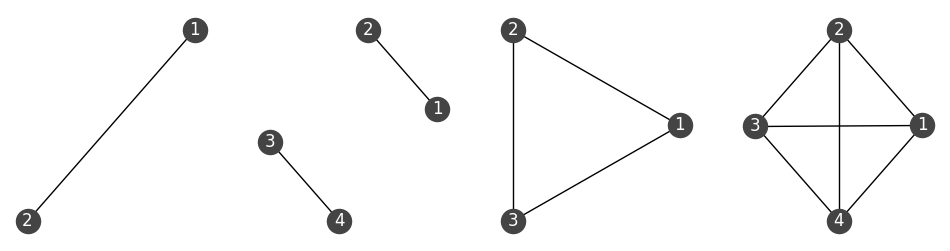

In [ ]:
# Code for problem I

# n=2, k=1
k1 = nx.Graph() # Create graph
k1.add_nodes_from([1,2]) # Create nodes
k1.add_edges_from([(1,2)]) # Create edges

# n=4, k=1
k11 = nx.Graph() # Create graph
k11.add_nodes_from([1,2,3,4]) # Create nodes
k11.add_edges_from([(1,2),(3,4)]) # Create edges

# n=3, k=2
k2 = nx.Graph() # Create graph
k2.add_nodes_from([1,2,3]) # Create nodes
k2.add_edges_from([(1,2),(2,3),(3,1)]) # Create edges

# n=4, k=3
k3 = nx.Graph() # Create graph
k3.add_nodes_from([1,2,3,4]) # Create nodes
k3.add_edges_from([(1,2),(2,3),(3,4),(4,1),(1,3),(2,4)]) # Create edges

# Plot
graph,ax = plt.subplots(1,4,figsize=(12,3))
nx.draw(k1, ax=ax[0], pos=nx.kamada_kawai_layout(k1),with_labels=True, node_color='#444444',font_color="white")
nx.draw(k11, ax=ax[1], pos=nx.kamada_kawai_layout(k11),with_labels=True, node_color='#444444',font_color="white")
nx.draw(k2, ax=ax[2], pos=nx.kamada_kawai_layout(k2),with_labels=True, node_color='#444444',font_color="white")
nx.draw(k3, ax=ax[3], pos=nx.kamada_kawai_layout(k3),with_labels=True, node_color='#444444',font_color="white")


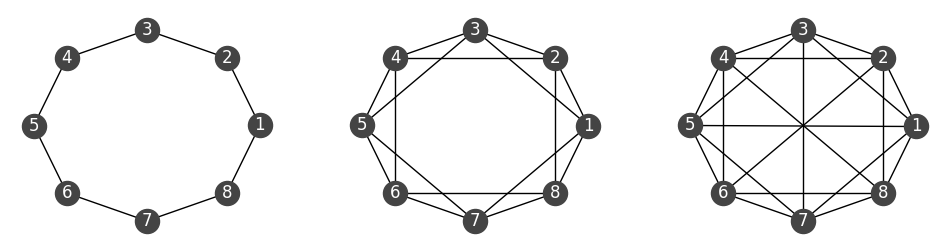

In [ ]:
# Demonstration for n>k+1 for opposing parities of k and n, n=8, k=5
# n=8, k=2
k82 = nx.Graph() # Create graph
k82.add_nodes_from([1,2,3,4,5,6,7,8]) # Create nodes
k82.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,1)]) # Create edges

# n=8, k=4
k84 = nx.Graph() # Create graph
k84.add_nodes_from([1,2,3,4,5,6,7,8]) # Create nodes
k84.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,1),(1,3),(1,7),(2,4),(2,8),(3,5),(4,6),(5,7),(6,8)]) # Create edges

# n=8, k=5
k85 = nx.Graph() # Create graph
k85.add_nodes_from([1,2,3,4,5,6,7,8]) # Create nodes
k85.add_edges_from([(1,2),(2,3),(3,4),(4,5),(5,6),(6,7),(7,8),(8,1),(1,3),(1,7),(2,4),(2,8),(3,5),(4,6),(5,7),(6,8),(1,5),(2,6),(3,7),(4,8)]) # Create edges

# Plot
graph,ax = plt.subplots(1,3,figsize=(12,3))
nx.draw(k82, ax=ax[0], pos=nx.kamada_kawai_layout(k82),with_labels=True, node_color='#444444',font_color="white")
nx.draw(k84, ax=ax[1], pos=nx.kamada_kawai_layout(k84),with_labels=True, node_color='#444444',font_color="white")
nx.draw(k85, ax=ax[2], pos=nx.kamada_kawai_layout(k85),with_labels=True, node_color='#444444',font_color="white")

#**Overview and Conclusions**


From this project, we have learned how to prove, and hence, predict certain properties of $k$-regular graphs simply by using linear algebra. By turning a $k$-regular graph into an adjacency matrix, we can now predict that its exact maximum eigenvalue will be $k$, and we know that the rest of its eigenvalues will all be smaller than $k$. Of course, the important caveat is that the $k$-regular graph is connected, at least for when predicting the multiplicity of the $k$ eigenvalue.

We have also learned that you can’t have a $k$-regular graph of all shapes and sizes. As we found out in problem $I$, certain properties must hold in order for a graph to be $k$-regular, otherwise its construction will be impossible. The graph will by default create a square adjacency matrix, but if there is an odd number of nodes, then the $k$ factor must be even in order for a $k$-regular to be possible to construct.

In this project, using Python, we were able to construct graphs using the `networkx` library, find eigenvalues and their multiplicities of adjacency matrices, and demonstrate the proofs from problems $C, D, E, F,$ and $I$. Taking everything we learned, we were able to easily prove in problem $H$ that a Petersen Graph, which is $3$-regular, has an eigenvalue of $3$.

Along with the mathematical proofs that were made, we have successfully connected linear algebra with graph theory to conclude this project.
